In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [2]:
df = pd.read_excel('CustomerChurn.xlsx')

In [3]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer ID        7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

## Decision Tree

In [31]:
X = df.drop(['LoyaltyID','Customer ID','Churn',],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [6]:
y = df['Churn']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [8]:
tree =  DecisionTreeClassifier(max_depth=6)

In [9]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [11]:
y_pred = tree.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.90      0.85       505
         Yes       0.65      0.47      0.54       200

    accuracy                           0.78       705
   macro avg       0.73      0.68      0.70       705
weighted avg       0.76      0.78      0.76       705



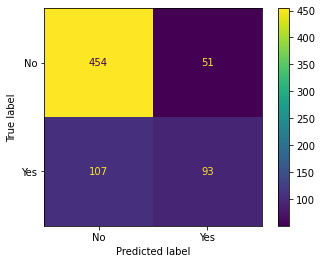

In [14]:
plot_confusion_matrix(tree,X_test,y_test)

## Random Forest

In [15]:
rf = RandomForestClassifier(n_estimators=100)

In [17]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
y_pred = rf.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.90      0.85       505
         Yes       0.65      0.45      0.53       200

    accuracy                           0.77       705
   macro avg       0.73      0.68      0.69       705
weighted avg       0.76      0.77      0.76       705



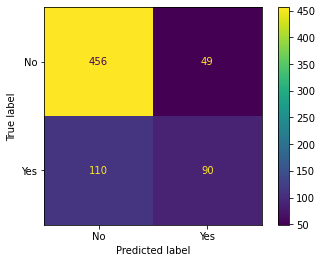

In [20]:
plot_confusion_matrix(rf,X_test,y_test)

## Logistic Regresion

In [21]:
logistic = LogisticRegression(solver='liblinear', penalty='l2', C= 1, random_state=1)
logistic.fit(X_train, y_train)

LogisticRegression(C=1, random_state=1, solver='liblinear')

In [22]:
y_pred = logistic.predict(X_test) 

In [24]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

          No       0.82      0.89      0.85       505
         Yes       0.64      0.53      0.58       200

    accuracy                           0.78       705
   macro avg       0.73      0.71      0.72       705
weighted avg       0.77      0.78      0.78       705



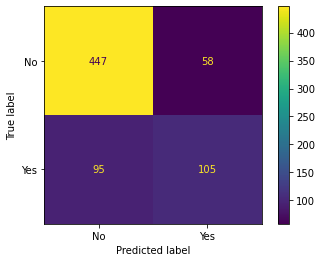

In [23]:
plot_confusion_matrix(logistic,X_test,y_test)

In [37]:
X = df.drop(['LoyaltyID','Customer ID','Churn',],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [38]:
#X = X.fillna(X.mean())

In [39]:
y = df['Churn']
class_le = LabelEncoder()
y = class_le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0])

In [40]:
X['intercept'] = 1
logistic_ml = sm.Logit(y, X)
logistic_coef = logistic_ml.fit()
logistic_coef.summary()

Optimization terminated successfully.
         Current function value: 0.413772
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7020
Method:                           MLE   Df Model:                           22
Date:                Thu, 31 Mar 2022   Pseudo R-squ.:                  0.2849
Time:                        21:24:02   Log-Likelihood:                -2914.2
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Tenure                                    -0.0603      0.006     -9.677      0.000      -0.073      -0.048
Monthly Charges                           -0.0407      0.032     -1.284      0.199      -0.103       0.021
Total Charges                              0.0003   7.07e-05      4.644      0.000       0.000       0.000
Senior Citizen_Yes                         0.2157      0.085      2.552      0.011       0.050       0.381
Partner_Yes                               -0.0023      0.078     -0.030      0.976      -0.155       0.150
Dependents_Yes                            -0.1518      0.090     -1.692      0.091      -0.328       0.024
Phone Service_Yes                          0.5082   3.27e+06   1.55e-07      1.000   -6.41e+06    6.41e+06
Multiple Lines_No phone service            0.3266   3.27e+06   9.98e-08      1.000   -6.41e+06    6.41e+06
Multiple Lines_Yes                         0.4482      0.177      2.531      0.011       0.101       0.795
Internet Service_Fiber optic               1.7581      0.797      2.205      0.027       0.195       3.321
Internet Service_No                       -0.2569   1.76e+07  -1.46e-08      1.000   -3.45e+07    3.45e+07
Online Security_No internet service       -0.2569        nan        nan        nan         nan         nan
Online Security_Yes                       -0.2037      0.179     -1.141      0.254      -0.554       0.146
Online Backup_No internet service         -0.2569   1.76e+07  -1.46e-08      1.000   -3.45e+07    3.45e+07
Online Backup_Yes                          0.0271      0.175      0.155      0.877      -0.316       0.370
Device Protection_No internet service     -0.2569   1.76e+07  -1.46e-08      1.000   -3.45e+07    3.45e+07
Device Protection_Yes                      0.1485      0.176      0.842      0.400      -0.197       0.494
Tech Support_No internet service          -0.2569   1.76e+07  -1.46e-08      1.000   -3.45e+07    3.45e+07
Tech Support_Yes                          -0.1784      0.180     -0.989      0.323      -0.532       0.175
Streaming TV_No internet service          -0.2569   1.76e+07  -1.46e-08      1.000   -3.45e+07    3.45e+07
Streaming TV_Yes                           0.5933      0.326      1.820      0.069      -0.046       1.232
Streaming Movies_No internet service      -0.2569   1.76e+07  -1.46e-08      1.000   -3.45e+07    3.45e+07
Streaming Movies_Yes                       0.6048      0.326      1.853      0.064      -0.035       1.245
Contract_One year                         -0.6649      0.108     -6.185      0.000      -0.876      -0.454
Contract_Two year                         -1.3799      0.176     -7.847      0.000      -1.725      -1.035
Paperless Billing_Yes                      0.3423      0.074      4.596      0.000       0.196       0.488
Payment Method_Credit card (automatic)    -0.0871      0.114     -0.763      0.445      -0.311       0.136
Payment Method_Electronic check